In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [20]:
def self_avoiding_walk(N):
    possible_moves_amount = [4]
    i = 0
    # Create a set to hold the points that we visit
    path = set()
    actual_visited = set()
    # Start the chain at the origin
    growing_chain = [np.array([0, 0])]
    # Add the starting point to the path
    path.add(tuple(growing_chain[0]))
    actual_visited.add(tuple(growing_chain[0]))

    # Available directions
    available_directions = [np.array([1, 0]), np.array([-1, 0]), np.array([0, 1]), np.array([0, -1])]

    # Function to get available moves
    def get_available_moves(point, list):
        next_points = [point + direction for direction in available_directions]
        return [p for p in next_points if tuple(p) not in list]

    # Loop to generate the walk
    while(len(growing_chain) < (N)):
        available_moves = get_available_moves(growing_chain[-1], path)
        while len(available_moves) == 0:
            # Backtrack if no moves are available
            growing_chain.pop()
            possible_moves_amount.pop()
            available_moves = get_available_moves(growing_chain[-1], path)
        # Choose a random available move
        chosen_point = available_moves[np.random.randint(len(available_moves))]
        # Update path
        growing_chain.append(chosen_point)
        i += 1
        possible_moves_amount.append(len(get_available_moves(chosen_point, actual_visited)))
        actual_visited.add(tuple(chosen_point))
        path.add(tuple(chosen_point))
    
    # possible_moves_amount.reverse()
    
    return growing_chain, possible_moves_amount

In [21]:
def distFromOrigin(position):
    return math.fabs(math.sqrt((position[0] - 0)**2 + (position[1] - 0)**2))

In [22]:

def plot_walk(walk):
    walk = np.array(walk)
    plt.figure(figsize=(8, 8))
    plt.plot(walk[:, 0], walk[:, 1], markersize=5)
    plt.title('Self-Avoiding Walk')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

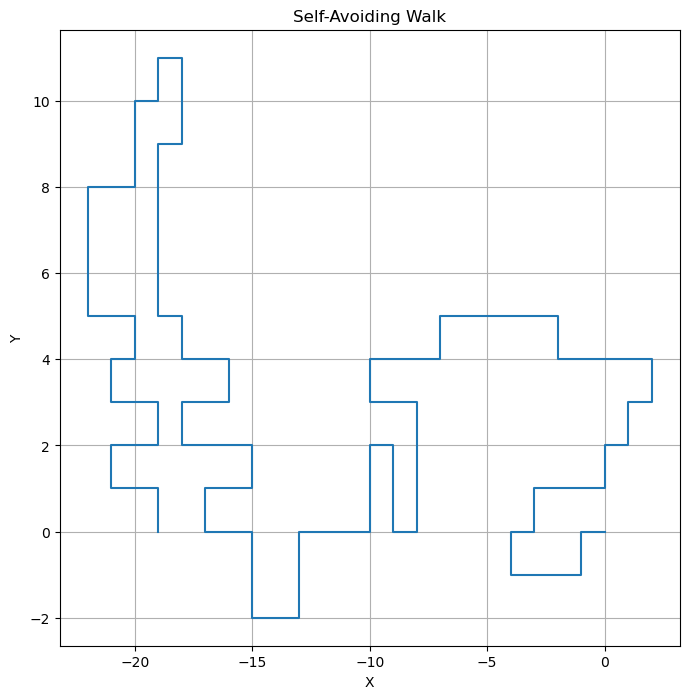

Options at each step: [4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3]
Average distance from origin: 16.85926223195988


In [28]:
N = 100
sum = 0 
for i in range(N):
    chain, options = self_avoiding_walk(100)
    sum += distFromOrigin(chain[-1])
plot_walk(chain)
print("Options at each step:", options)
print(f'Average distance from origin: {sum/N}')

In [26]:
product = 1
for i in range(len(options)):
    product *= options[i]
print(product)

2457558259172692003805386760312426404382828082574105242635729378722665787055208789408718560599552920956900091426859313763101449291329177553245129621840180610511675728887114839074872051951853562924901172173876290102195888168434893283186243917896480093674713934004785482844891555820148372436266949020973938112562820788280337039179292829445362081368839616646003066903323983221021490557478135445556851344463156082732099073096926385788090709945280817647548226570993717253087658443217186175897358400921168369939277623116775261461191405974383567515247908233962474560058610843236724807120029743357900415797721130379940291011089167267975554161979492133389029325583548729210355227342849773555747179611626287117342588663312700297416660493316014374399380790742495895452579507448245402947939189960781360393704560109042104037732367214574345188091108651747866210291207930061973529522488227151330338446817791174423455945125142984937468008271210518332748886481399281212373567605987343860904095642408674445273716428934